In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
N = 864
m =10
L = 34.1580
nsteps = 10000
V = L**3
rho = N/L
sigma = 3.4
radii = np.linspace(0,20,100, endpoint=True)

In [52]:
file_dists = 'distances.dat'
distances =  np.genfromtxt(file_dists, delimiter=" ", usecols=range(0,1), unpack=False)
distances = distances[distances != 0]
histogram_distances = np.histogram(distances,radii, density=False)[0]

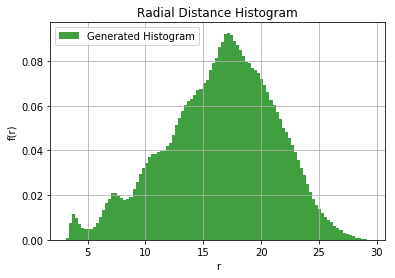

In [53]:
plt.title('Radial Distance Histogram')
n3, bins3, patches3 = plt.hist(distances, 100, density=True, facecolor='g', alpha=0.75, label='Generated Histogram')
plt.grid(True)
plt.legend()
plt.xlabel('r')
plt.ylabel('f(r)')
plt.show()

In [57]:
dr = radii[1]

RDF = histogram_distances
RDF = RDF/rho
for i, r in enumerate(radii[1:]):
    dr = radii[i+1] - radii[i]
    RDF[i] = RDF[i]/(4 * np.pi * r**2 * dr)

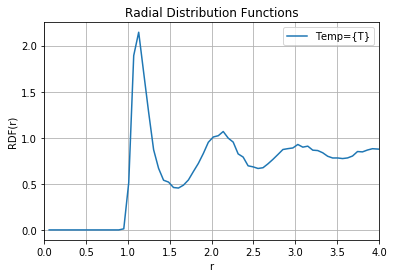

In [58]:
plt.title('Radial Distribution Functions')
plt.plot(radii[1:]/sigma, RDF, label='Temp={T}')
plt.grid(True)
plt.legend()
plt.xlabel('r')
plt.ylabel('RDF(r)')
plt.xlim(0,4)
plt.show()

In [56]:
file_temps = 'temps.dat'
temp_series =  np.genfromtxt(file_temps, delimiter=" ", usecols=range(0,1), unpack=False)

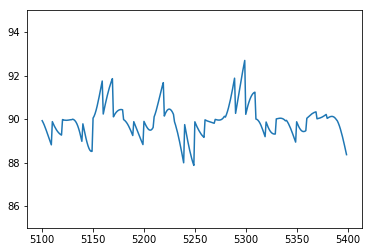

In [8]:
plt.plot(np.arange(nsteps)[5100:5400], temp_series[5100:5400])
plt.ylim(85,95)
plt.show()